**Informe de redes neuronales** \\
*Estudiante: Gabriel Lías* \\
*CI: 24804344*

# Redes Neuronales
Las redes neuronales, son un algoritmos de machine learning que intenta modelar la estructura y funcionamiento de algunos componentes del sistema nervioso de los animales. \\
 \\
 **Red neuronal de los animales** \\

La red neuronal de los animales esta conformado por neuronas conectadas entre si en una red, cada neurona tiene tres estructuras diferenciadas:

1.   *El cuerpo celular*: es el centro de la neurona y procesa las señales o impulsos que llegan de otras células.
2.   *Las dentritas*: Es la vía de entrada de las señales que se combinan en el cuerpo de la neurona.

1.   *El axón*: actúa como canal para la transmisión de los impulsos generados y canecta con las dentritas de otras células a través de la sinapsis

La sinapsis son las unidades funcionales y estructuras elementales que median entre las interacciones de las neuronas. En las terminales de las sinapsis se encuentran sustancias neurotransmisoras que ayuda a la propagación de las señales electroquímicas de una neurona a otra.

La eficiencia o fuerza de las conexiones entre neuronas se modifica en el tiempo para que la información se transmita de una neurona a otra y poder hacer alguna actividad en partícular, esto se da en la repetición de la actividad, cuando esto ocurre se dice que el cerebro esta aprendiendo.

**Red neuronal artificial**

En el algoritmo de redes neuronales se busca emular el comportamiento de una red neuronal de los animales, para poder resolver problemas complejos, como por ejemplo, problemas de clasificación, regresión, optimización, etc.

En la red neuronal primero tenemos una capa de entrada, donde iran los datos que tenemos para el problema que queremos resolver, a continuación la información de las neuronas de la capa de entrada pasan a la siguiente capa de neuronas a traves de las conexiones que existen entre cada neurona de la primera capa con la segunda, en cada conexión hay un peso sinaptico ($w$).

En las neuronas de las capas siguiente a la capa de entrada se coloca una función de activación, esta función devuelve una salida que será generada por la neurona dada una entrada o conjunto de entradas. Luego la información pasa a las neuronas de la siguiente capa hasta llegar a la última capa, la capa de salida. En esta capa también se coloca una función de activación en la neurona, luego la salida de esta neurona será la respuesta a nuestro problema con la red neuronal que hemos implementado. 










# **Funciones de activación**

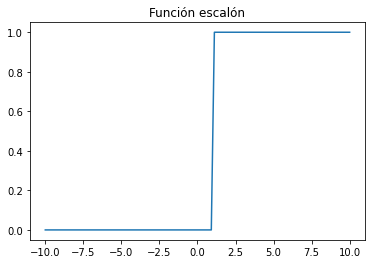

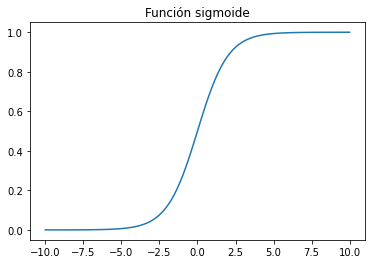

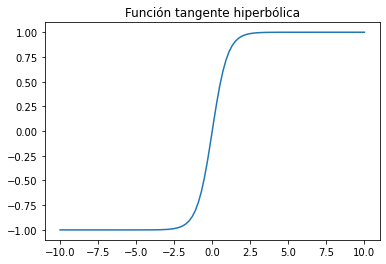

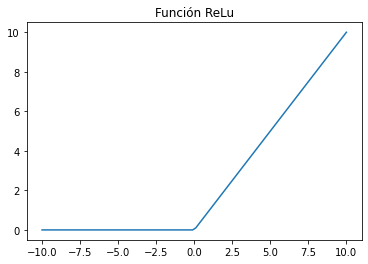

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def umbral(x):
    if x >= 1:
        return 1
    else:
        return 0

def sigmoide(x):
    return 1 / (1 + np.exp(-x)) 

def tanh(x):
    return (2 / (1 + np.exp(-2*x))) - 1

def relu(x):
    return np.maximum(0, x)

x = np.linspace(-10, 10, 100) 

y_umbral = [umbral(i) for i in x]
y_sigmoide = [sigmoide(i) for i in x]
y_tanh = [tanh(i) for i in x]
y_relu = [relu(i) for i in x]

plt.plot(x, y_umbral)
plt.title('Función escalón')
plt.show()

plt.plot(x, y_sigmoide)
plt.title('Función sigmoide')
plt.show()

plt.plot(x, y_tanh)
plt.title('Función tangente hiperbólica')
plt.show()

plt.plot(x, y_relu)
plt.title('Función ReLu')
plt.show()

*La función escalón*, muestra que si la x es menor que cero la neurona va a ser cero pero cuando es mayor o igual a cero dará como salida igual 1. Esta función se usa cuando se quiere clasificar o cuando se tiene salidas categóricas.

*La función sigmoide* $\frac{1}{1+e^{-x}}$

Está función esta dada en un rango de valores de salida está entre cero y uno por lo que la salida es interpretada como una probabilidad. Si se evalúa la función con valores de entrada muy negativos, la función será igual a cero, si se evalúa en cero la función dará 0.5 y en valores altos su valor es aproximadamente a 1. Por lo que esta función se usa en la capa de salida y se usa para clasificar datos entre dos categorías.

*Función tangente hiperbólica* $\frac{2}{1+e^{-2x}}-1$

Esta función de activación llamada tangente hiperbólica tiene un rango de valores de salida entre -1 y 1. Se dice que está función es un escalamiento de la función sigmoide.

*Función ReLu*  

Si la entrada de esta función son valores negativos el resultado es cero pero si la entrada son valores positivos queda igual.

Existen otro tipos de funciones de activación pero estas son las más utilizadas

# **Perceptrón simple**

El modelo de perceptrón simple consta de n neuronas en la entrada de la red y m neuronas en la capa de salida, utiliza como función escalón como función de activación donde se define un umbral, para valores que supere este valor la función dará 1 y cero para el caso contrario.


En cada conexión que hay entre neuronas se coloca un valor de peso ($w$), este valor se suele escoger de forma aleatorio al construir la red neuronal, además se coloca un valor de bias (b) que es el valor de sesgo de los datos es este valor que define el valor del umbral de la función de activación. 

Cada valor de las neuronas en la salida serán multiplicada por el peso de la conexión con la siguiente neurona, y luego se suma cada valor más el valor del b del bias. El resultado quedará almacenado en la neurona de la salida para posteriormente ser evaluado en la función de activación, este será el resultado de nuestra red. 

$$y_{j} = f\left(\sum_{j = 0}^{∞}w_{ij}x_j +b\right)\ \ \ \ \ \ \ \ \  Ec. 1$$

Donde $w_{ij}$ son los valores de los pesos de cada conexión entre neuronas $x_j$ son los valores que estan en las neuronas de la entrada de la red y b es el bias.

Si nuestro objetivo es clasificar variables categóricas es probable que no tengamos un buen resultado con el modelo de nuestra red, porque no esta entrenada. Necesitamos ajustar el valor de los pesos y bias. 

Para hacer esto se utiliza la siguiente fórmula

$$Δw_i = α(y'_i - y_i)x_i$$

Donde $α$ es un valor entre 0 y 1 llamado factor de aprendizaje, es una constante empírica que determina la facilidad con la que la red aprende. $y'_i$ es la salida deseada (target) y $y_i$ es la salidad que obtenemos con nuestro modelo. x_i es el valor i-ésimo en la entrada.

Así ajustamos los valores de la red, es conveniente probar distintos valores de $α$ hasta encontra un valor que ajuste bien los valores. 

Matemáticamente lo que estamos haciendo es buscar los valores de la pendiente y la ordenada al origen de una recta. 

Se considera que solo se dos neuronas en la capa de entrada

$\sum_{j = 0}^{1}w_jx_j +b = 0 ⇒ w_ox_o + w_1x_1 + b=0$ 


$x_1 = \frac{-w_0}{w_1}-\frac{b}{w_1}$ Tengo la ecuación de una recta.

El objetivo es encontrar los valores de $w$ y b que ajuste la recta tal que pueda separar las variables categoricas. 

Text(0.5, 1.0, 'Ejemplo de perceptrón simple')

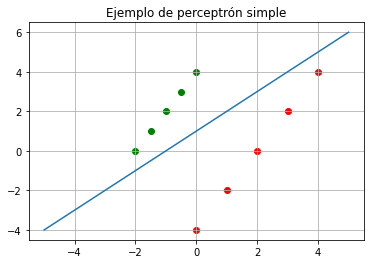

In [ ]:
x = np.linspace(-5, 5, 100)

y = [i+1 for i in x]

plt.plot(x, y)
plt.grid()

x_a = np.linspace(-2, 0, 5)
x_b = np.linspace(0, 4, 5)

y_a = np.linspace(0, 4, 5)
y_b = np.linspace(-4, 4, 5)

plt.scatter(x_a, y_a, c = 'green')
plt.scatter(x_b, y_b, c ='red')

plt.title('Ejemplo de perceptrón simple')

La recta azul es la recta que queremos encontrar ajustando los valores de $w$ y b, para poder separar las variables categóricas en regiones en el espacio delimitados por la recta.

El problema es de este tipo de modelo es que solo funciona para problemas linealmente separable. Además existen otros algoritmos que ya hacen este trabajo conmás eficiencia

# **Perceptrón multicapa**

El perceptrón multicapa es similar al modelo simple, con la diferencia que ahora tenemos capas entre la entrada y salida de la red neuronal, estas capas son llamadas capas ocultas. La cantidad de capas ocultas y la cantidad de neuronas que colocamos en cada capa dependerá del problema que queramos tratar. 

En este modelo tendremas más conexiones entre neuronas, esto quiere decir que tendremos más cantidad de pesos #w$, tendremos los pesos que conectan la entrada con la primera capa oculta, luego los pesos que conectan la segunda capa oculta con la tercera capa oculta, y así sucesivamente hasta tener los pesos que conecta la última capa oculta con la salida de la red. En cada neurona se deberá colocar una función de activación y la entrada de la siguiente neurona será la suma de la salida de la capa anterior, la salida de la capa anterior está definida por la Ec. 1

Este modelo se puede utilizar para resolver problemas que no son linealmente separable

# **Forward y Backpropagation**

Cuando estamos recorriendo la red multicapa desde la entrada hasta la salida, esta fase se conoce como *Forward* (hacia adelante), con esto obtenemos la salida de nuestra red pero probablemente no sea la salida que queramos, tenemos que ajustar los pesos y las bias para poder obtener la respuesta que buscamos. Pero en este modelo tendremos una gran cantidad de pesos y bias, para poder ajustarlos todos de forma eficiente, se utiliza el *Backpropagation*, es un algoritmo en donde recorremos la red desde la salida hasta la entrada, en cada capa calculamos como afectó el peso $w$ a la función de costo. La función de costo es utilizada para medir el error cometido por la red ($y'_i-y_i$). 

Para saber como afecta $w$ al costo de la red calculo la siguiente derivada. 
$$\frac{∂C}{∂w}$$

Pero a su vez C depende de la salida de la capa anterior $a$, y la salida depende de la suma de los productos entre los pesos y la entrada $z$ (argumento dentro de la suma) y esta suma depende de los pesos $w$, por lo tanto, para calcular el valor de la derivada se debe aplicar la rlega de la cadane

$$\frac{∂C}{∂w} = \frac{∂C}{∂a^L}\frac{∂a^L}{∂z^L}\frac{∂z^L}{∂w^L}$$

Los índice L indica el número de la capa.
Se repite el procedimiento para la capa anterior hasta llegar a la entrada de la red. 

De esta forma se calcula el error de la red y se puede ajustar el valor de los pesos y bias.

# **Descenso del gradiente**

El *descenso del gradiente* es  un método de optimización que nos indica  donde disminuye una función, nos indica  donde se encuentra un mínimo local. Para esto tomamos el valor inical de $w_{ij}$ y se calcula su gradiente luego se multiplica por el factor de aprendizaje, luego se le resta este valor a $w_{ij}$, de forma similar para ajustar los valores de b. Este proceso se repite hasta encontrar los valores adeacuados que solucione el problema que queremos resolver con la red neuronal. 